In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [20]:
file = './m0d12EarthImpact.csv'
df = pd.read_csv(file,index_col=False)
df.loc[:,'angle'] = np.rad2deg(np.arcsin(df.loc[:,'b']))
df.loc[:,'targ_core_loss'] = 1-df.loc[:,'targ_core_dumpto_lr']

In [21]:
df.describe()

,M_tar,b,v,gamma,v_mutual,m_lr,targ_ratio_lr,Z_Fe_lr,targ_core_complete_loss,lr_targ_core_vap_frac,targ_core_complete_loss_vapfrac,targ_core_dumpto_lr,Q_targ_norm,angle,targ_core_loss
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.123921,0.484689,40.395632,0.348950,8.440527,0.054008,0.435828,0.625287,0.096565,0.052512,0.278013,0.903328,1.183190,29.500993,0.096672
std,0.000009,0.153569,19.073033,0.224774,4.062269,0.004342,0.035035,0.044181,0.060029,0.037655,0.171218,0.060253,0.110943,10.224439,0.060253
min,0.123911,0.174000,16.363700,0.025000,3.321637,0.047187,0.380810,0.550460,0.005677,0.004774,0.045603,0.648291,0.940641,10.020470,0.005677
25%,0.123911,0.400000,25.073023,0.100000,5.148917,0.050397,0.406662,0.591439,0.058364,0.015194,0.138010,0.877703,1.087822,23.578178,0.058364
50%,0.123930,0.500000,35.563000,0.250000,7.477982,0.053932,0.435246,0.617814,0.083044,0.046883,0.241986,0.916956,1.175656,30.000000,0.083044
75%,0.123930,0.600000,53.548656,0.550000,10.965915,0.057981,0.467891,0.657643,0.122297,0.087033,0.388925,0.941636,1.263196,36.869898,0.122297
max,0.123930,0.780000,94.866415,0.700000,19.994622,0.061659,0.497534,0.749381,0.351709,0.121857,0.854589,0.994323,1.407045,51.260575,0.351709


M_tar : target planet mass in Earth mass unit [M$_{\oplus}$] 

b     : impact parameter sin($\theta_{imp}$)

v     : impact velocities in km/s

v_mutual : impact velocities in mutual escape velocities unit

gamma : M$_{impactor}$/M$_{target}$

m_lr : mass of the largest remnant in Earth mass unit [M$_{\oplus}$] 

targ_ratio_lr : M$_{lr}$/M$_{target}$ mass ratio between mass of the largest remnant and the target planet mass

Z_Fe_lr: iron mass fraction of the largest remnant after the impact (if no reaccretion then it's the core fraction of the new planet after cooling)

⭐ targ_core_complete_loss: the fraction of core material originally from the target core that get lost (not left in the largest remnant nor the runner but only in debris or ejacta)

lr_targ_core_vap_frac: vaporized core material in the largest remnant after the impact

targ_core_complete_loss_vapfrac: vaporized core material in the totally lost core debris (ratio of vaporization of core in the "targ_core_complete_loss")

Q_targ_norm : Q$_{R}$/Q$^{'*}_{TD}$ impact energy normalized by energy need to expel half of the target mass

In [23]:
print(r"Current Mercury's mass over a 0.1239 Earth mass target planet :",0.055/0.1239)

Current Mercury's mass ratio over a 0.1239 Earth mass target planet : 0.44390637610976597


In [24]:
# select data with targ_ratio_lr less than the above ratio to count in the re-accretion of debris
# select data with iron mass fraction larger than 65%
sel = (df.targ_ratio_lr>0.4)&(df.targ_ratio_lr<0.45)&(df.Z_Fe_lr>0.65)
df[sel].sort_values(by=['Z_Fe_lr'])

,M_tar,b,v,gamma,v_mutual,m_lr,targ_ratio_lr,Z_Fe_lr,targ_core_complete_loss,lr_targ_core_vap_frac,targ_core_complete_loss_vapfrac,targ_core_dumpto_lr,Q_targ_norm,angle,targ_core_loss
46,0.123930,0.500,36.489556,0.250,7.826749,0.050497,0.407464,0.654381,0.108609,0.059951,0.255555,0.891391,1.299580,30.000000,0.108609
25,0.123911,0.700,87.178369,0.100,18.741668,0.054155,0.437050,0.655371,0.042773,0.112053,0.625096,0.957228,1.187325,44.427004,0.042772
99,0.123930,0.600,39.949801,0.550,8.126584,0.050328,0.406104,0.655565,0.109977,0.059563,0.263702,0.890023,1.319611,36.869898,0.109977
51,0.123930,0.600,48.826387,0.250,10.472911,0.050839,0.410228,0.656502,0.099655,0.086359,0.347206,0.900345,1.256128,36.869898,0.099655
117,0.123911,0.700,53.366873,0.700,10.490752,0.052339,0.422392,0.658784,0.070057,0.082049,0.347173,0.929943,1.249894,44.427004,0.070057
2,0.123930,0.174,49.139132,0.025,10.335202,0.052643,0.424781,0.659951,0.071038,0.111151,0.396090,0.928962,1.169196,10.020470,0.071038
8,0.123930,0.500,65.023836,0.025,13.676157,0.055294,0.446169,0.662085,0.012447,0.087697,0.480317,0.987553,1.090957,30.000000,0.012447
23,0.123911,0.400,37.886907,0.100,8.144954,0.052302,0.422095,0.663018,0.064790,0.064279,0.315806,0.935210,1.241663,23.578178,0.064790
96,0.123930,0.700,57.944591,0.550,11.787083,0.052072,0.420173,0.663481,0.068025,0.105317,0.394324,0.931975,1.241448,44.427004,0.068025
77,0.123911,0.600,43.182800,0.400,8.974299,0.049575,0.400088,0.672653,0.100619,0.078214,0.301800,0.899381,1.312858,36.869898,0.100619


<Axes: xlabel='targ_core_complete_loss', ylabel='Count'>

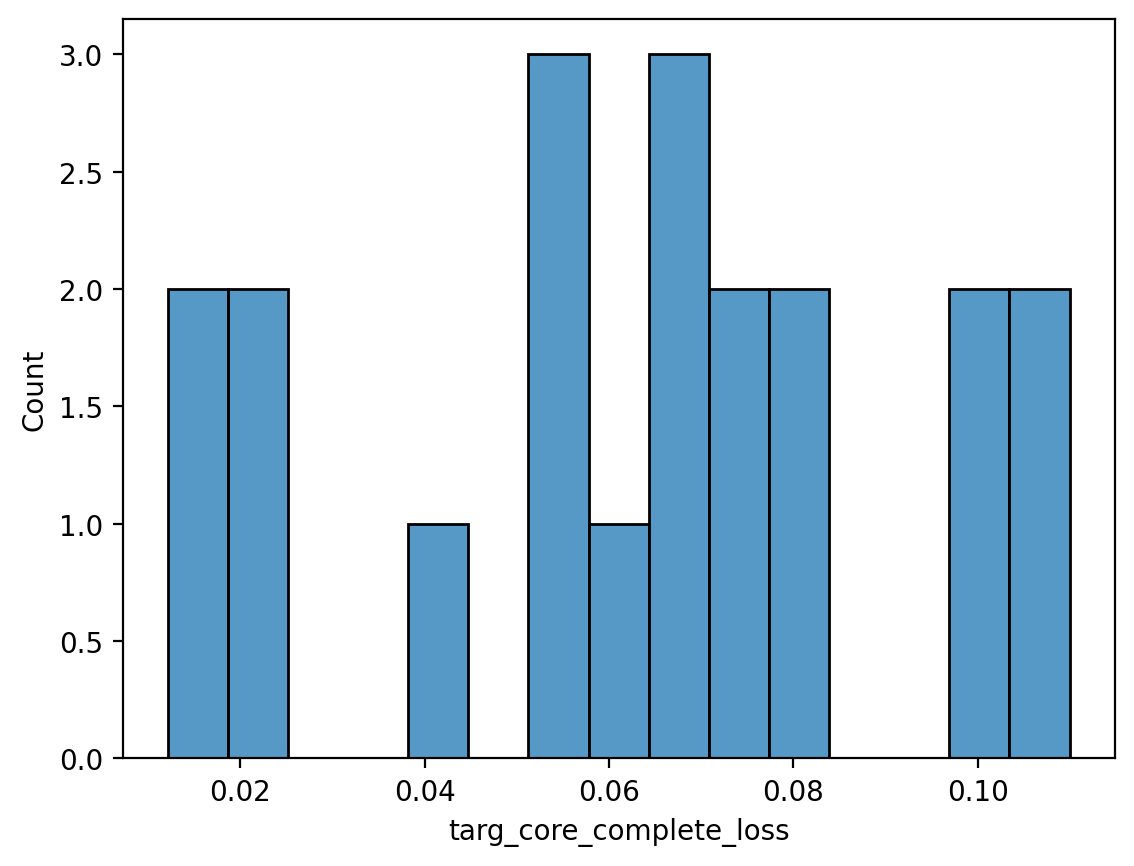

In [31]:
sns.histplot(df[sel].targ_core_complete_loss,bins=15)

Text(0, 0.5, 'fraction of target core material get lost')

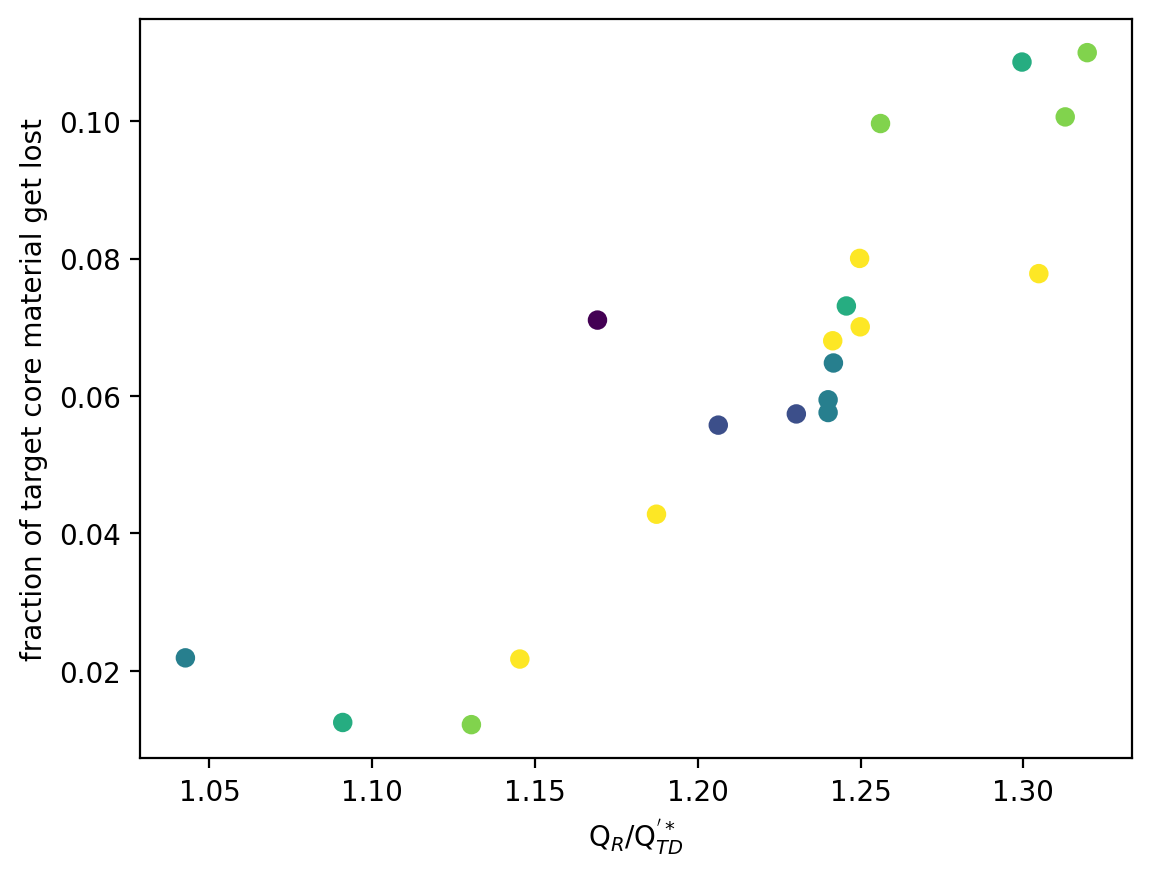

In [36]:
ax = plt.gca()
ax.scatter(df[sel].Q_targ_norm,df[sel].targ_core_loss,c= df[sel].b)

ax.set_xlabel(r"Q$_{R}$/Q$^{'*}_{TD}$")
ax.set_ylabel('fraction of target core material get lost')

Text(0, 0.5, 'fraction of target core material get lost')

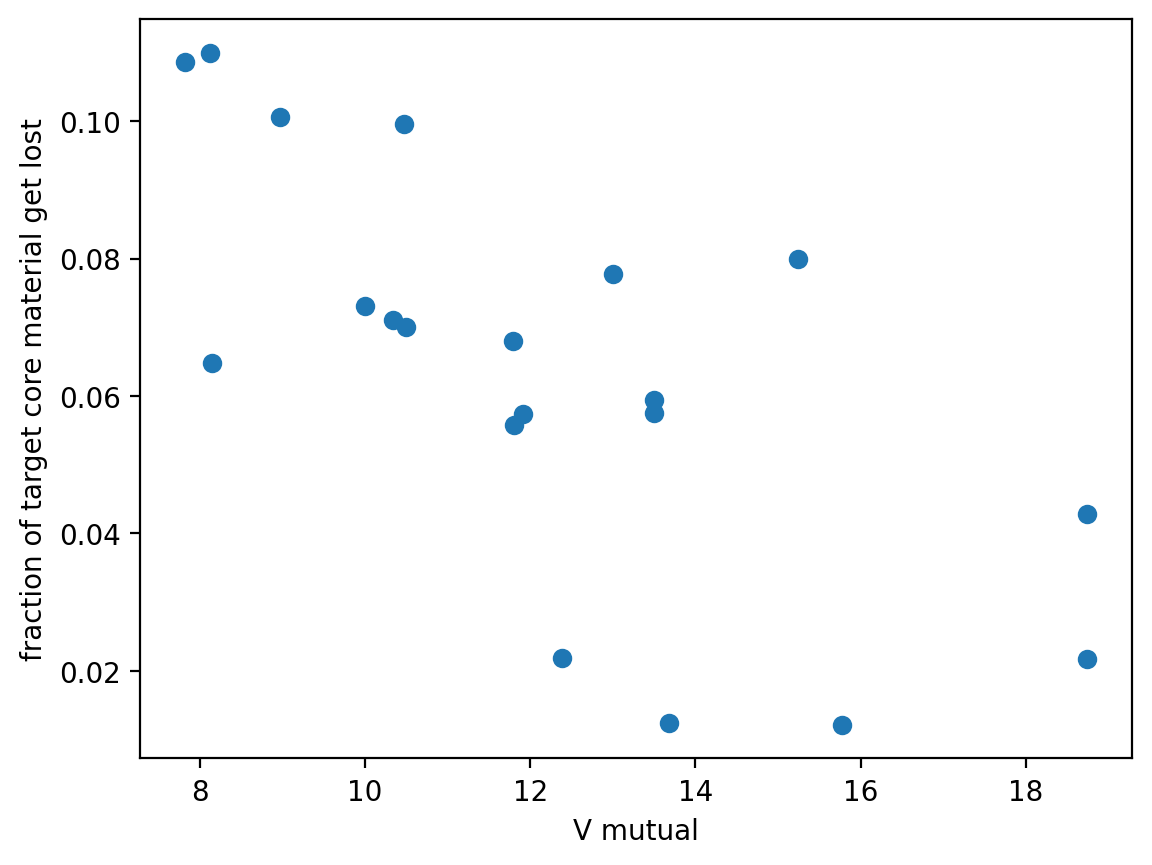

In [33]:
ax = plt.gca()
ax.scatter(df[sel].v_mutual,df[sel].targ_core_loss)

ax.set_xlabel(r"V mutual")
ax.set_ylabel('fraction of target core material get lost')